# Project 3

This program reads a text file containing the novel Metamorphosis by Franz Kafka and analyzes it by:
how many words are in the novel,
how many unique words are in the novel, and 
how often the most used words occur in the novel.

In [2]:
# pandas from zybooks chapter 8.13 Data frames
import pandas as pd
# matplotlib from zybooks chapter 9.9 Bar charts
import matplotlib.pyplot as plt
# seaborn from zybooks chapter 9.9 Bar charts
import seaborn as sns

In [3]:
# suppress warning: using pd.unique() with an argument that is not...will raise an error in a future version of pandas.
import warnings
warnings.filterwarnings("ignore", message="unique with argument")

In [4]:
file_path = 'Metamorphosis.txt'  # Path to text file

# Open the file using open() from zybooks chapter 7.7 Reading files
with open(file_path, 'r', encoding="utf8") as file:
    # Read the contents of the file and store it in a variable named Metamorphosis
    Metamorphosis = file.read()

In [5]:
# Characters to replace with whitespace
characters_to_replace = [',','-', '.','[',']', '“', '”','—', '#', '*', ':', ';', '"', '!', '\n', '/', '(', ')', '$', '™', '?', '%', '‘', '•']

# Replace characters with whitespace using .replace()
for char in characters_to_replace:
    Metamorphosis = Metamorphosis.replace(char, ' ')

# Replace consecutive whitespaces with single whitespace
while '  ' in Metamorphosis:
    Metamorphosis = Metamorphosis.replace('  ', ' ')

# Convert the entire content to lowercase using .lower()
Metamorphosis = Metamorphosis.lower()

In [6]:
# Split the string into words using split()
words = Metamorphosis.split()

# Count the number of words using len()
num_words = len(words)

# Count the number of unique words using a set from zybooks chapter 3.4 set basics
# A set is an unordered collection of unique elements, No elements in the set share the same value
# passing a list into set() will cause any duplicates to be omitted in the created set.
unique_words = set(words)
num_unique_words = len(unique_words)

# Print the results
print("Number of words in Metamorphosis:", num_words)
print("Number of unique words in Metamorphosis:", num_unique_words)

Number of words in Metamorphosis: 22047
Number of unique words in Metamorphosis: 2616


In [7]:
# from zybooks chapter 3.5 Dictionary basics
# Initialize an empty dictionary to store word counts
# Dictionaries are typically used in place of lists when an associative relationship exists
# the key:value pairs are word and count
wordcounts = {}

# Iterate through all the words in Metamorphosis
for word in Metamorphosis.split():
    # Check if the word is already in the dictionary
    if word in wordcounts:
        # If the word is already in the dictionary, increment its count
        wordcounts[word] += 1
    else:
        # If the word is not in the dictionary, add it with a count of 1
        wordcounts[word] = 1

# Sort the dictionary by values (word counts) in descending order
sorted_wordcounts = sorted(wordcounts.items(), key=lambda x: x[1], reverse=True)

# Display results for the 40 most repeated words
print("Top 40 Most Repeated Words in Metamorphosis:")
print("-" * 30)

for word, count in sorted_wordcounts[:40]:
    print(f"{word}: {count}")

Top 40 Most Repeated Words in Metamorphosis:
------------------------------
the: 1148
to: 753
and: 642
he: 577
his: 550
of: 429
was: 409
it: 352
had: 352
in: 348
that: 333
a: 285
as: 242
gregor: 199
with: 199
she: 196
him: 188
her: 187
would: 187
not: 176
but: 171
at: 169
for: 166
they: 156
on: 152
all: 135
room: 131
from: 119
could: 119
be: 119
out: 114
have: 107
if: 103
there: 102
been: 101
gregor’s: 99
so: 97
father: 96
sister: 96
this: 92


In [8]:
# Get the top 30 most repeated words and their counts
top_words = [pair[0] for pair in sorted_wordcounts[:40]]
top_counts = [pair[1] for pair in sorted_wordcounts[:40]]

In [9]:
# Convert the list of words to a pandas Series
top_words_series = pd.Series(top_words)

# Get the unique values
order = pd.unique(top_words_series)

In [10]:
# I used a horizontal bar chart like we learned in zybooks chapter 9.3 Bar charts
# The chart is drawn using two axes: a category axis that displays the category names and a value axis that displays the counts
# A horizontal bar chart is useful when numerous categories exist because the categories increase the height rather than width

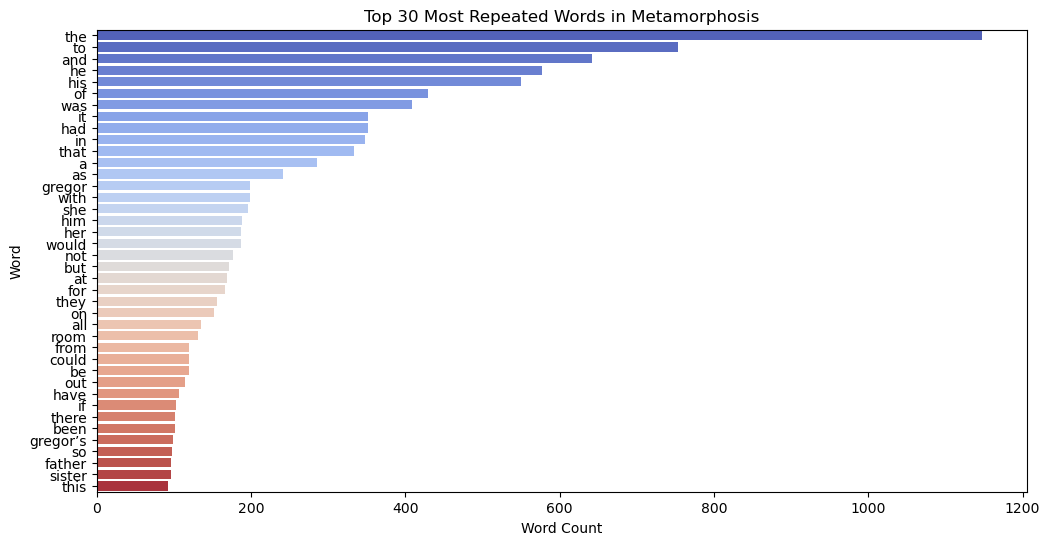

In [11]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))
sns.barplot(x=top_counts, y=top_words, palette="coolwarm")

# Set the title and labels
plt.title("Top 30 Most Repeated Words in Metamorphosis")
# value axis that displays the counts
plt.xlabel("Word Count")
# category labels along the category axis
plt.ylabel("Word")

# Show the plot
plt.show()